In [1]:
import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.layers import Dense, LSTM, Dropout
import tensorflow.keras.backend as K 

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


import pandas as pd

import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

from math import sqrt

C:\Users\julia\tf_jupyter\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\julia\tf_jupyter\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\julia\tf_jupyter\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
X_train = pd.read_csv("model_input_data/PCT_train_X.csv")
y_train = pd.read_csv("model_input_data/PCT_test_X.csv")

X_test = pd.read_csv("model_input_data/PCT_train_y.csv")
y_test = pd.read_csv("model_input_data/PCT_test_y.csv")

# X_train = X_train[(X_train["shift_YEAR"] == 2019)&(X_train["LG"] == 1)]
# X_test = X_test[(X_test["shift_YEAR"] == 2019)&(X_test["LG"]==1)]

X_train = X_train[(X_train["LG"] == 1)]
X_test = X_test[(X_test["LG"]==1)]


sel_col = ['shift_H_A',"shift_era", "shift_avg","shift_PCT","shift_SLG"]

train_index = X_train.index
test_index = X_test.index

y_train = y_train.iloc[train_index,:]
y_test = y_test.iloc[test_index,:]

X_train = X_train[sel_col].reset_index(drop = True)
X_test = X_test[sel_col].reset_index(drop = True)

In [46]:
X_train_v = X_train.values
y_train_v = y_train.values

X_test_v = X_test.values
y_test_v = y_test.values

In [47]:
X_train_t = X_train_v.reshape(X_train_v.shape[0], X_train_v.shape[1],1)
X_test_t = X_test_v.reshape(X_test_v.shape[0], X_train_v.shape[1],1)

In [48]:
X_train_t.shape

(292, 5, 1)

In [49]:
X_train_t[0]

array([[0.5       ],
       [5.35845329],
       [0.25331725],
       [0.5       ],
       [0.37416667]])

In [56]:
K.clear_session() 

model = Sequential()
optimizer = RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0)

model.add(LSTM(40,input_shape = (X_train_v.shape[1],1))) # (timestep, feature)
model.add(Dense(1)) # output = 1
model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40)                6720      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________


In [57]:
early_stop = EarlyStopping(monitor='loss', mode = 'min',patience=2, verbose=1)


hist1 = model.fit(X_train_t, y_train_v, epochs=100,
          batch_size=1, verbose=1, callbacks=[early_stop])

Train on 292 samples
Epoch 1/100
292/292 [==============================] - 5s 17ms/sample - loss: 0.0266 - mae: 0.1281
Epoch 2/100
292/292 [==============================] - 3s 9ms/sample - loss: 0.0146 - mae: 0.0979
Epoch 3/100
292/292 [==============================] - 3s 9ms/sample - loss: 0.0147 - mae: 0.0970
Epoch 4/100
292/292 [==============================] - 3s 9ms/sample - loss: 0.0146 - mae: 0.0963
Epoch 5/100
292/292 [==============================] - 3s 9ms/sample - loss: 0.0145 - mae: 0.0966
Epoch 6/100
292/292 [==============================] - 3s 9ms/sample - loss: 0.0145 - mae: 0.0962
Epoch 7/100
292/292 [==============================] - 3s 9ms/sample - loss: 0.0143 - mae: 0.0963
Epoch 8/100
292/292 [==============================] - 3s 10ms/sample - loss: 0.0142 - mae: 0.0960
Epoch 9/100
292/292 [==============================] - 3s 9ms/sample - loss: 0.0145 - mae: 0.0958
Epoch 10/100
292/292 [==============================] - 3s 10ms/sample - loss: 0.0142 - mae: 0.

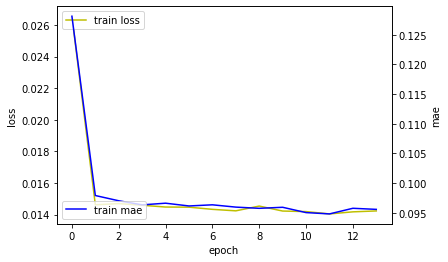

In [58]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist1.history['loss'], 'y', label='train loss')

acc_ax.plot(hist1.history['mae'], 'b', label='train mae')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mae')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [59]:
y_pred = model.predict(X_test_t)

In [60]:
pd.DataFrame({"y_pred":y_pred.reshape(-1), 
              "y":y_test_v.reshape(-1)})

,y_pred,y
0,0.516332,0.608696
1,0.487553,0.434783
2,0.524546,0.416667
3,0.516562,0.541667
4,0.494340,0.391304


In [61]:
y_test_v

array([[0.60869565],
       [0.43478261],
       [0.41666667],
       [0.54166667],
       [0.39130435]])

In [62]:
rms = sqrt(mean_squared_error(y_test_v, y_pred.astype(np.float64).reshape(5,1)))
rms

0.08270456663119312